# Dimensionality Reduction

modified from: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 and https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

#### Let's take a look at how we can use dimensionality reduction techniques to improve our machine learning algorithms

### PCA and T-SNE for data visualization

Another common use for dimensionality reduction techniques is for data visualization. Visualizing data in lower dimensions helps us to see trends which are otherwise impossible to see. Seeing these trends can help us identify the most strategic ways to deal with our data.

Lets look at the iris dataset:

In [1]:
# get the dataset
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#### First we will look at using PCA:

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.


In [2]:
# standardize the data
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [3]:
# Use PCA to project from 4D to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

Now we can visualize this transformed data. Notice that on the graph below the classes seem well separated from each other. 

In [4]:
# Visualize the transformed data
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

<Figure size 800x800 with 1 Axes>

What exactly is this plot telling us? 
We can use explained variance to find out:



In [5]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.


#### Now let's look at how we can do this same thing using t-SNE:

In [6]:
from sklearn.manifold import TSNE

n_sne = 7000

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

# df_tsne = x.copy()
# df_tsne['x-tsne'] = tsne_results[:,0]
# df_tsne['y-tsne'] = tsne_results[:,1]

principalDf = pd.DataFrame(data = tsne_results
             , columns = ['component 1', 'component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.868185
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.812248
[t-SNE] KL divergence after 300 iterations: 0.126407


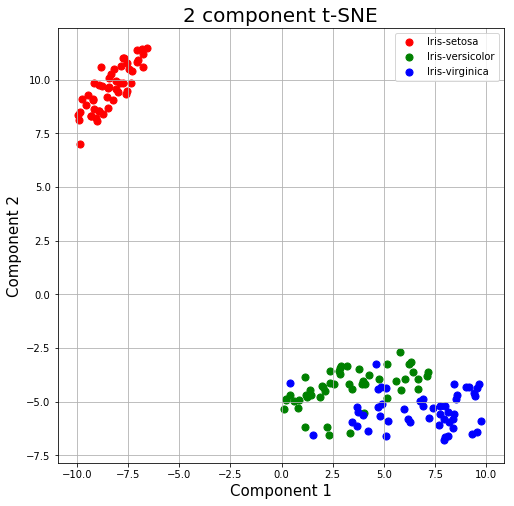

In [7]:
# Visualize the transformed data
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

### PCA for speed up

The most common use for dimensionality reduction techniques is to decrease the input dimension of the data in order to speed up the processing time for machine learning algorithms.

Let's take a look at the MNIST dataset:

In [8]:
# rm ~/scikit_learn_data/mldata/mnist-original.mat

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Let's split the data into training and test sets:

In [9]:
from sklearn.model_selection import train_test_split

# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, 
                                                            test_size=0.2, random_state=0)

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Now we can import and apply PCA. we want scikit-learn choose the minimum number of principal components such that 95% of the variance is retained. We can do this as so:

In [11]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

Now we can fit PCA on the training set. Then apply the mapping (transform) to both the training and test sets.

In [12]:
pca.fit(train_img)

train_img_pca = pca.transform(train_img)
test_img_pca = pca.transform(test_img)

Now that we have used pca to transform the data, we can apply logistic regression to the transformed data.

In [15]:
# generate a logistic regression model on the transformed data
from sklearn.linear_model import LogisticRegression
import time

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

# fit the model
time_start = time.time()
logisticRegr.fit(train_img_pca, train_lbl)
time_end = time.time()

# measure the model performance using accuracy
print("accuracy:", logisticRegr.score(test_img_pca, test_lbl))

# figure out the time it took
print("time:", time_end-time_start)

/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs f

accuracy: 0.9184285714285715
time: 18.839728355407715


/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Let's compare this to how long it would take to fit a logistic regression model to the original data:

In [14]:
# generate a logistic regression model on the original data
from sklearn.linear_model import LogisticRegression
import time

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

# fit the model
time_start = time.time()
logisticRegr.fit(train_img, train_lbl)
time_end = time.time()

# measure the model performance using accuracy

print("accuracy:", logisticRegr.score(test_img, test_lbl))

# figure out the time it took
print("time:", time_end-time_start)

/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs f

accuracy:

0.9158571428571428
time:

41.26142692565918


/home/janelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


So we see that using PCA on the MNIST dataset did speed up the fitting of the algorithm!